# Demo: Instance segmentation from semantic masks

In [ ]:
%%script false

import os
import sys
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Automatically reload imported programmes
%load_ext autoreload
%autoreload 2

# Directories (ammend as necessary)
root_dir = '/content/gdrive/MyDrive/IDSAI/PROOF/filament-segmentation'
os.chdir(root_dir)  # Move to root_dir
sys.path.insert(0, root_dir)

In [1]:
import os
import sys

# Root directory containing git repo `andrw3000/filament-segmentation`
root_dir = '/Users/Holmes/Research/IDSAI/PROOF/filament-segmentation'
os.chdir(root_dir)
sys.path.insert(0, root_dir)

# Automatically reload imported programmes
%load_ext autoreload
%autoreload 2

## File structure and imports

In [2]:
import random
import numpy as np
from glob import glob
from skimage import io
from skimage import color
from tqdm.notebook import tqdm
from utils import get_line_instances, shade_instances, grid_display_masks
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Local directories

In [3]:
# Directory containing original image and semantic mask subdirectories
data_dir = os.path.join(root_dir, 'data/tomograms2D/tf1')

# Image and semantic mask directories with identical corresponding filenames
image_dir = os.path.join(data_dir, 'png-original')
mask_dir = os.path.join(data_dir, 'png-masks/semantic')

# Outputs
os.makedirs('outputs', exist_ok=True)

# Experiment name
experiment = 'tf1-first15'
os.makedirs('outputs/' + experiment, exist_ok=True)

### Identify files

In [4]:
# Uncomment as necessary to process all or a subset of filnames
file1 = 'tf1_006.png'
file2 = 'tf1_031.png'
image_names = sorted([os.path.join(image_dir, file1),
                      os.path.join(image_dir, file2)])
mask_names = sorted([os.path.join(mask_dir, file1),
                     os.path.join(mask_dir, file2)])

image_names = sorted(glob(os.path.join(image_dir, '*.png')))
image_names = image_names[:15]
mask_names = sorted(glob(os.path.join(mask_dir, '*.png')))
mask_names = mask_names[:15]

### Load images and masks

In [5]:
if not image_names or not mask_names:
    raise SystemError('Image or mask directory contains no PNGs.')

images = io.imread_collection(image_names)
masks = io.imread_collection(mask_names)

# Number of Images and Mask
if not len(images) == len(masks):
    raise ValueError('Images and mask not in 1:1 correspondence')
else:
    print('Processing {} images'.format(len(images)))

print('\nSample image shape:')
print('images[0].shape =', images[0].shape)
print('masks[0].shape =', masks[0].shape)

Processing 15 images

Sample image shape:
images[0].shape = (3710, 3838)
masks[0].shape = (3710, 3838)


In [6]:
# Ensure single channel binary masks
bmasks = []
for mask in tqdm(masks):
    if len(mask.shape) > 2:
        mask = color.rgb2gray(mask)
    bmasks.append((mask.astype(float) > 0).astype(int) * 255)
    
print('New mask shape:')
print('bmasks[0].shape =', bmasks[0].shape)


New mask shape:
bmasks[0].shape = (3710, 3838)


## Instance segmentation

### Choose hyper parameters

In [7]:
# Minim line length to extract as proportion of longest image length
length_tol = 0.05

# Proposed pixel width of filaments
line_pixel_width = 100

# Pixel seperation between proposed lines: less -> more lines
line_sep = line_pixel_width

### Perform line extraction

In [8]:
# Compute instances and line ends from semantic mask
instance_masks = []
for bmask in tqdm(bmasks):
    instances, line_ends = get_line_instances(
        bmask, length_tol, line_pixel_width, line_sep,
    )
    instance_masks.append((instances, line_ends))

## Outputs

### Save hyperparameter details

In [9]:
%%capture cap_params --no-stderr
print('Hyperparameters:')
print('----------------\n')
print('length_tol = ', length_tol)
print('line_pixel_width = ', line_pixel_width)
print('line_sep = ', line_sep)

In [10]:
# Save coordinates to text file
with open('outputs/' + experiment + '/params.txt', 'w') as f:
    f.write(str(cap_params))

### Print line ending coordinates

In [11]:
%%capture cap_coords --no-stderr
print('Line ending pixel coords pixel (row, col)')

for file_path, (instances, line_ends) in zip(image_names, instance_masks):
    print('-----------------------------------------\n')
    print('Image filename: ', os.path.basename(file_path))
    print('Number of co-linear lines identified: ', len(instances))
    # Check line ends
    for idx, end_pairs in enumerate(line_ends):
        print('\nLine endings on line {}:'.format(idx+1))
        for ends in end_pairs:
            e1 = ends[0]
            e2 = ends[1]
            print('({e1y:d}, {e1x:d}) -> ({e2y:d}, {e2x:d})'.format(
                e1y=int(e1[0]), e1x=int(e1[1]), e2y=int(e2[0]), e2x=int(e2[1])
            ))

In [12]:
# Print output
print(str(cap_coords))

Line ending pixel coords pixel (row, col)
-----------------------------------------

Image filename:  tf1_001.png
Number of co-linear lines identified:  18

Line endings on line 1:
(1456, 2379) -> (1674, 2161)
(1737, 2098) -> (2819, 1016)

Line endings on line 2:
(973, 3050) -> (1595, 2295)
(1758, 2097) -> (2072, 1717)
(2234, 1520) -> (2666, 996)
(3096, 474) -> (3237, 303)

Line endings on line 3:
(317, 2151) -> (1176, 1880)
(1245, 1859) -> (2853, 1352)
(2879, 1344) -> (3077, 1281)

Line endings on line 4:
(649, 3) -> (3013, 1395)

Line endings on line 5:
(2060, 3588) -> (2085, 3347)
(2173, 2514) -> (2394, 406)
(2397, 382) -> (2436, 14)

Line endings on line 6:
(1440, 2516) -> (1558, 2239)
(1660, 1998) -> (2481, 63)

Line endings on line 7:
(2155, 781) -> (2162, 986)
(2190, 1763) -> (2262, 3834)

Line endings on line 8:
(749, 588) -> (2854, 1904)

Line endings on line 9:
(1727, 2103) -> (1954, 3824)

Line endings on line 10:
(2642, 1628) -> (3115, 1155)

Line endings on line 11:
(262, 

In [13]:
# Save coordinates to text file
with open('outputs/' + experiment + '/coords.txt', 'w') as f:
    f.write(str(cap_coords))

### Plot masked images

In [14]:
%matplotlib inline

In [15]:
# Load example data
name, image, mask, (instances, line_ends) = random.choice(list(zip(image_names,
                                                                   images,
                                                                   masks,
                                                                   instance_masks,
                                                                   )))

print('Graphical output for file image:', os.path.basename(name))

Graphical output for file image: tf1_008.png


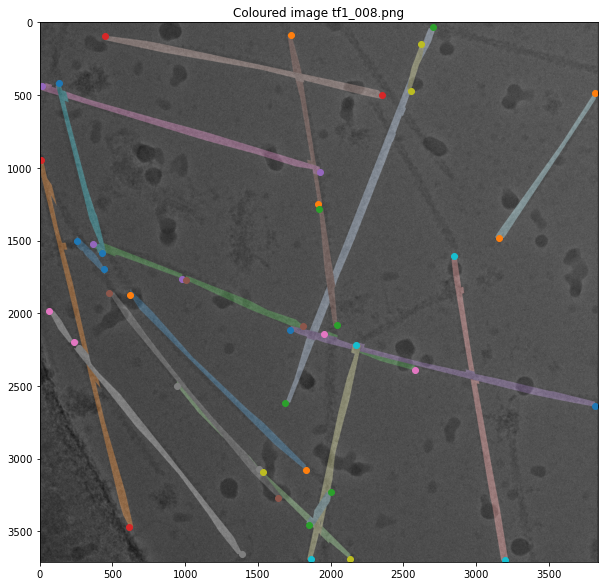

In [16]:
# Plot grid view of instances
fig = shade_instances(os.path.basename(name), image, instances, line_ends)

### Plot masked masks

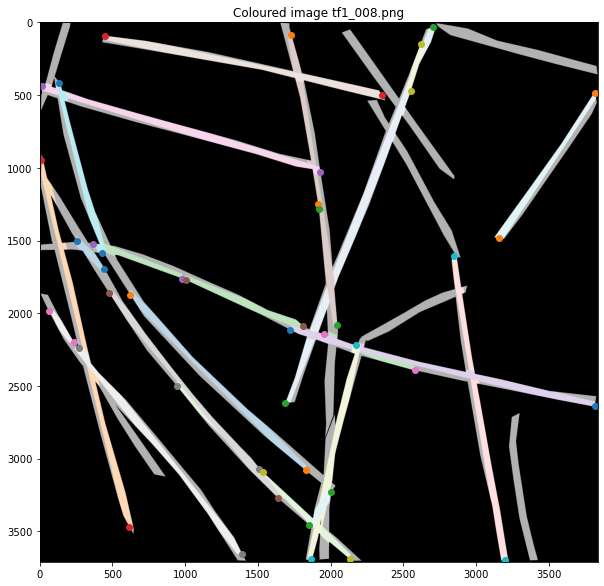

In [17]:
# Plot grid view of instances
fig = shade_instances(os.path.basename(name), mask, instances, line_ends)

### Plot grid view of masks

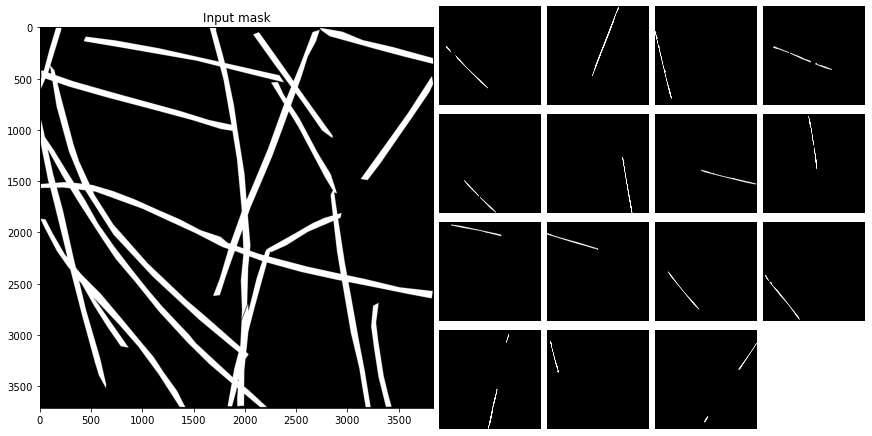

In [18]:
# Plot grid view of instances
fig = grid_display_masks(name, mask, instances)

### Save plots for all images

In [ ]:
%matplotlib agg

for name, image, mask, (instances, line_ends) in tqdm(zip(image_names,
                                                          images,
                                                          masks,
                                                          instance_masks,
                                                          )):

    fig1 = shade_instances(os.path.basename(name), image, instances, line_ends)
    fig2 = shade_instances(os.path.basename(name), mask, instances, line_ends)
    fig3 = grid_display_masks(name, mask, instances)
    
    if not os.path.exists('outputs/' + experiment + '/fig1'):
        os.makedirs('outputs/' + experiment + '/fig1')
        
    if not os.path.exists('outputs/' + experiment + '/fig2'):
        os.makedirs('outputs/' + experiment + '/fig2')                              
                              
    if not os.path.exists('outputs/' + experiment + '/fig3'):
        os.makedirs('outputs/' + experiment + '/fig3')
            
    fig1.savefig('outputs/' + experiment + '/fig1/' + os.path.basename(name))
    fig2.savefig('outputs/' + experiment + '/fig2/' + os.path.basename(name))
    fig3.savefig('outputs/' + experiment + '/fig3/' + os.path.basename(name))
    
    close(fig1)
    close(fig2)
    close(fig3)

/Users/Holmes/Research/IDSAI/PROOF/filament-segmentation/utils/instance_vis.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(constrained_layout=True, figsize=(12, 6))
